# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | forbes
Processing Record 3 of Set 1 | beipiao
Processing Record 4 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 5 of Set 1 | minas de marcona
Processing Record 6 of Set 1 | anloga
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | tindouf
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | onguday
Processing Record 17 of Set 1 | daru
Processing Record 18 of Set 1 | jinchang
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | prado
Processing Record 21 of Set 1 | tosontsengel
Processing Record 22 of Set 1 | w

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,288.22,81,100,0.50,AU,1736366635
1,forbes,-33.3833,148.0167,290.11,68,50,1.36,AU,1736366636
2,beipiao,41.7919,120.7792,259.16,43,29,5.94,CN,1736366637
3,minas de marcona,-15.2119,-75.1103,294.90,58,53,7.41,PE,1736366640
4,anloga,5.7947,0.8973,300.83,83,8,4.45,GH,1736366641


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,288.22,81,100,0.50,AU,1736366635
1,forbes,-33.3833,148.0167,290.11,68,50,1.36,AU,1736366636
2,beipiao,41.7919,120.7792,259.16,43,29,5.94,CN,1736366637
3,minas de marcona,-15.2119,-75.1103,294.90,58,53,7.41,PE,1736366640
4,anloga,5.7947,0.8973,300.83,83,8,4.45,GH,1736366641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

y = -0.38x +291.23


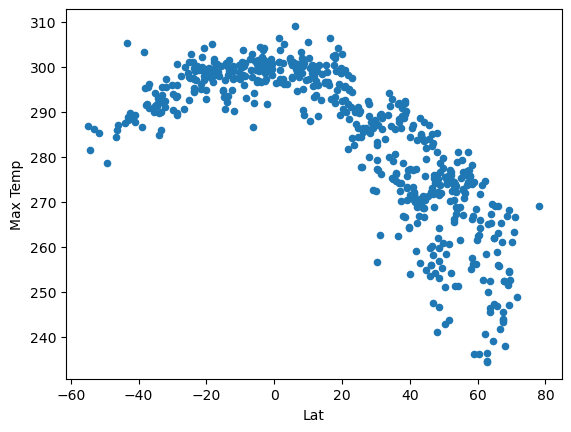

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x = "Lat", y = "Max Temp", kind = "scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
#plt.savefig("output_data/Fig1.png")


# (slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)) 
# print(line_eq)
#plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Show plot
plt.show()

#### Latitude Vs. Humidity

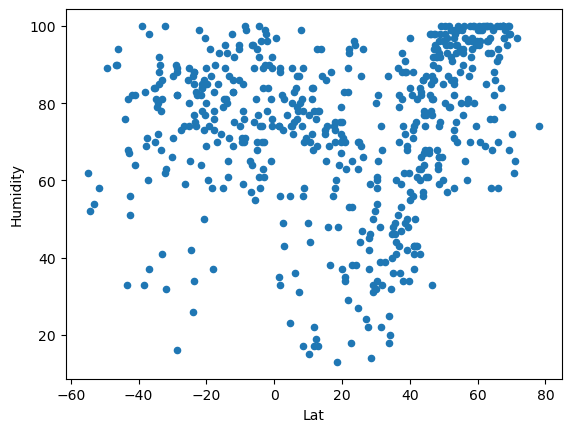

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x = "Lat", y = "Humidity", kind = "scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

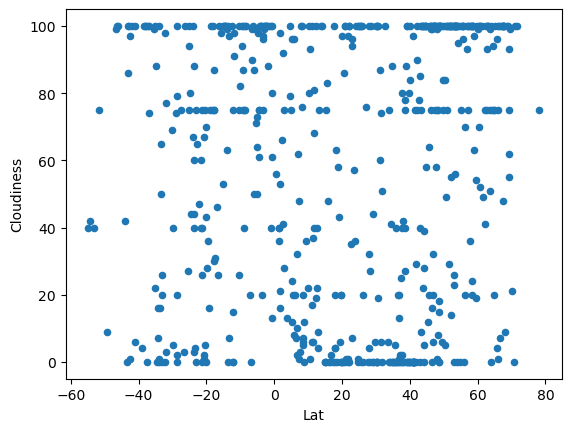

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x = "Lat", y = "Cloudiness", kind = "scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

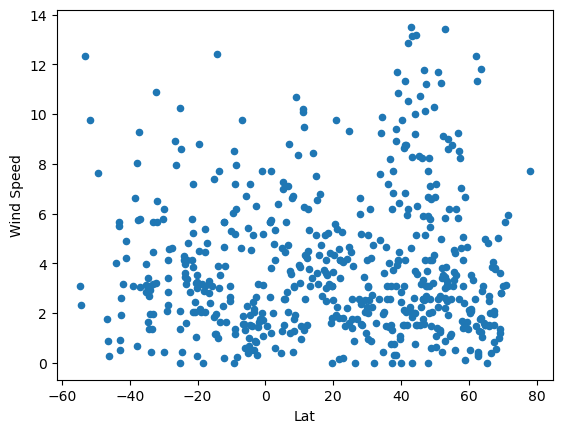

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x = "Lat", y = "Wind Speed", kind = "scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def plot_linreg(df, y, xC, yC):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df[y])
    regress_values = slope * df["Lat"] + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)) 
    
    df.plot(x = "Lat", y = y, kind = "scatter", figsize = (8, 6))
    plt.plot(df["Lat"],regress_values,"r-")
    plt.title(f"Latitude vs {y}")
    plt.annotate(line_eq, xy = (xC, yC), fontsize=15, color="red", annotation_clip = False)

    #print(f"The r^2 value is: {r**2}")

In [4]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,beipiao,41.7919,120.7792,259.16,43,29,5.94,CN,1736366637
4,anloga,5.7947,0.8973,300.83,83,8,4.45,GH,1736366641
6,iskateley,67.6803,53.1512,252.37,97,100,3.79,RU,1736366643
8,aasiaat,68.7098,-52.8699,266.88,95,100,5.02,GL,1736366645
10,tindouf,27.6711,-8.1474,292.40,22,0,2.57,DZ,1736366684


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,288.22,81,100,0.50,AU,1736366635
1,forbes,-33.3833,148.0167,290.11,68,50,1.36,AU,1736366636
3,minas de marcona,-15.2119,-75.1103,294.90,58,53,7.41,PE,1736366640
5,sao joao da barra,-21.6403,-41.0511,296.20,82,60,5.78,BR,1736366499
7,east london,-33.0153,27.9116,293.84,81,26,1.98,ZA,1736366350


###  Temperature vs. Latitude Linear Regression Plot

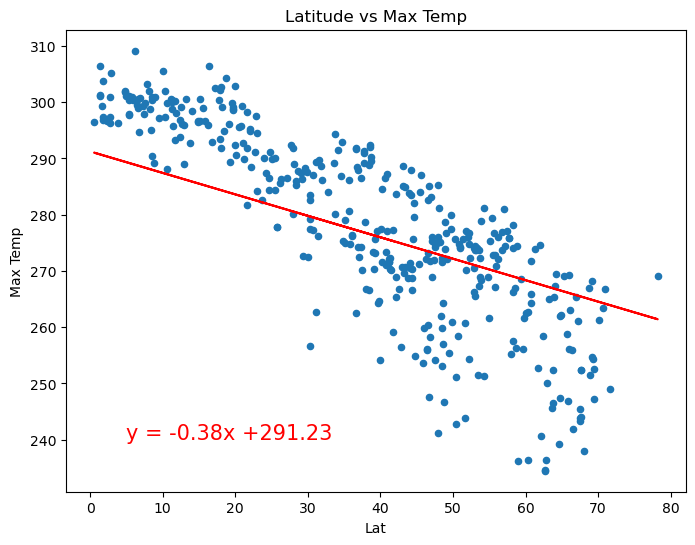

In [103]:
# Linear regression on Northern Hemisphere
plot_linreg(northern_hemi_df, "Max Temp", 5, 240)

plt.show()

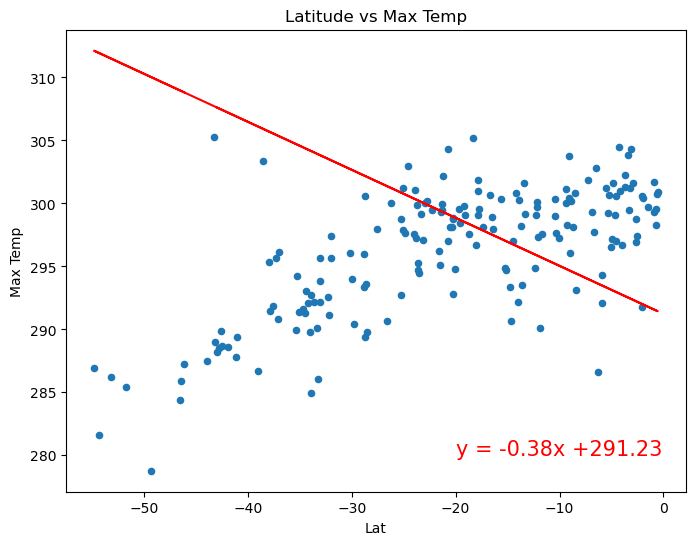

In [104]:
# Linear regression on Southern Hemisphere
plot_linreg(southern_hemi_df, "Max Temp", -20, 280)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

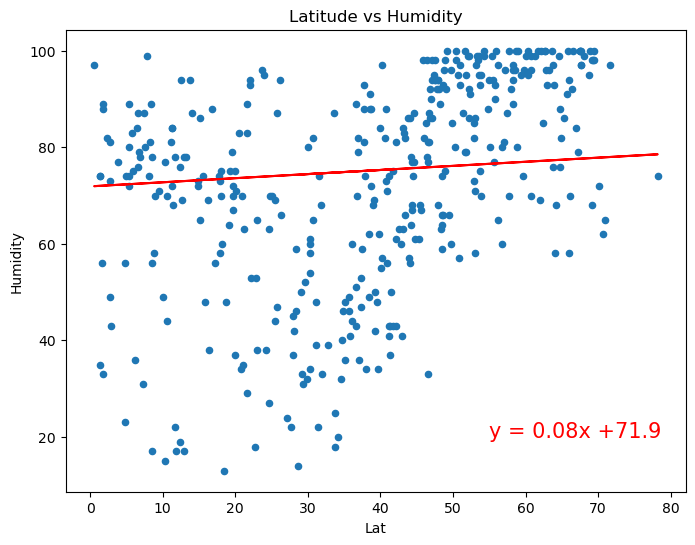

In [105]:
# Northern Hemisphere
plot_linreg(northern_hemi_df, "Humidity", 55, 20)

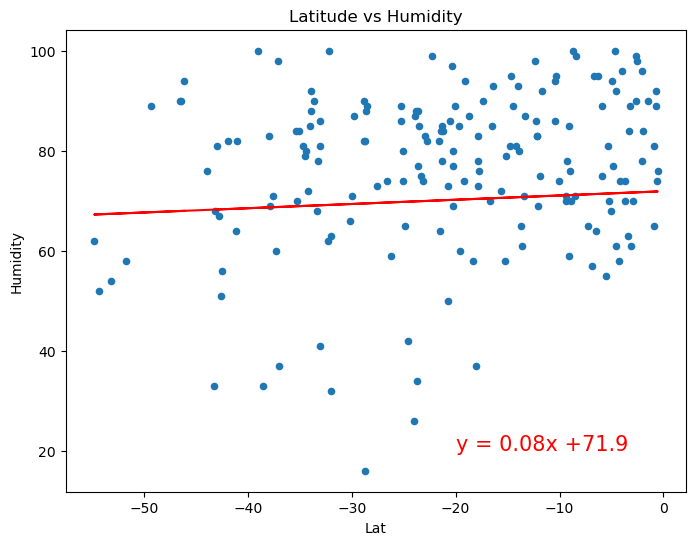

In [106]:
# Southern Hemisphere
plot_linreg(southern_hemi_df, "Humidity", -20, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

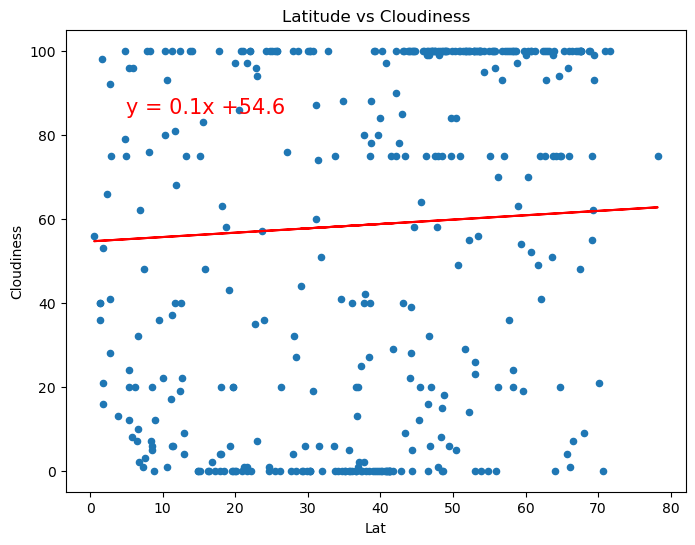

In [107]:
# Northern Hemisphere
plot_linreg(northern_hemi_df, "Cloudiness", 5, 85)

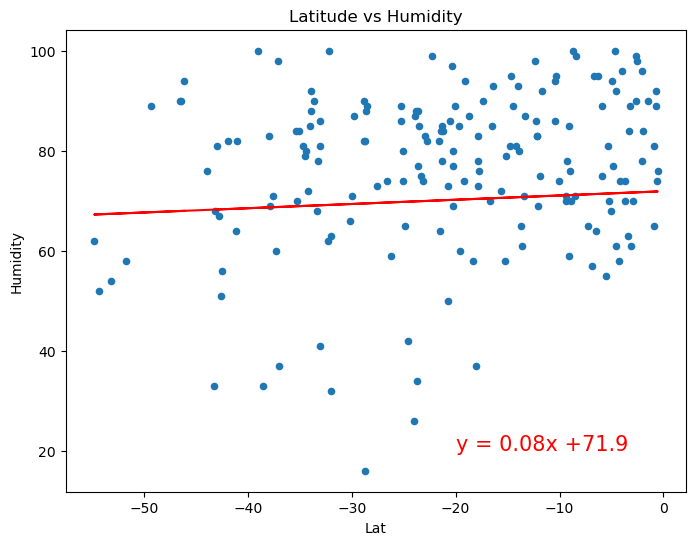

In [108]:
# Southern Hemisphere
plot_linreg(southern_hemi_df, "Humidity", -20, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

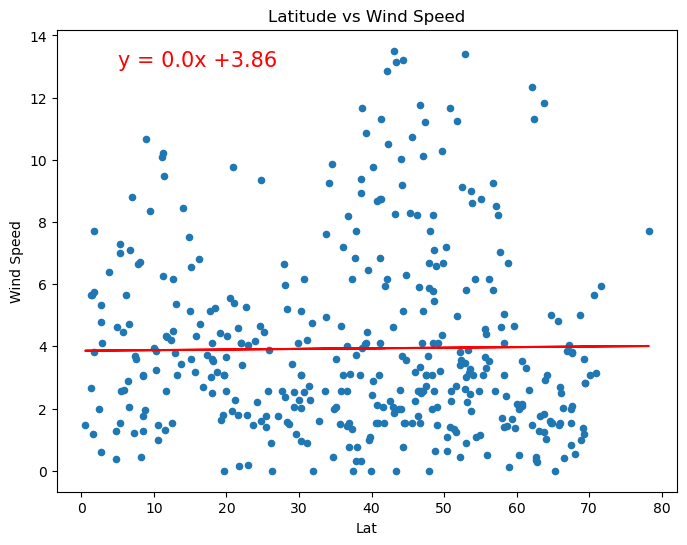

In [109]:
# Northern Hemisphere
plot_linreg(northern_hemi_df, "Wind Speed", 5, 13)

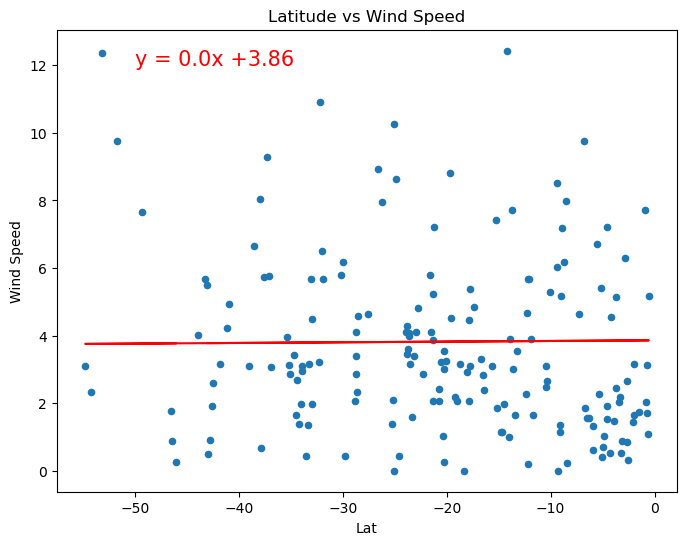

In [110]:
# Southern Hemisphere
plot_linreg(southern_hemi_df, "Wind Speed", -50, 12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE